In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Literacy
#### University of Tübingen, Winter Term 2021/22
## Exercise Sheet 7
&copy; 2021 Prof. Dr. Jakob Macke & Marius Hobbhahn

This sheet is **due on Monday, December 13, 2021 at 10am sharp (i.e. before the start of the lecture).**

---


# EXAMple 
# a)
$$ \sigma(s) = \frac{1}{(1+exp(-s)} = \frac{exp(s)}{exp(s)*(1+exp(-s))} = \frac{exp(s)}{exp(s)+(exp(s)*exp(-s))} = \frac{exp(s)}{exp(s)+exp(s-s)} = \frac{exp(s)}{1+exp(s)}$$ 

# b)
With $ \sigma(s) + \sigma(-s) = 1 $ and $ \sigma(-s) = 1-\sigma(s)$
$$ \frac{1}{(1+exp(s))} = 1 - \frac{1}{(1+exp(-s))}$$
$$ \frac{1+exp(-s)}{1+exp(s)} = exp(-s)$$
$$ \frac{1+exp(-s)}{exp(-s)+ exp(s)+exp(-s)} = 1 $$
$$ \frac{1+exp(-s)}{1+exp(-s)} = 1$$ 
$$ 1 = 1$$

# c)
With $\sigma(s) = \frac{1}{(1+exp(-s)}$ and $\sigma\prime(s) = -(1+exp(-s))^{-2}*(-exp(-s)) = (1+exp(-s))^{-2}*exp(-s) = \frac{exp(-s)}{(1+exp(-s))^2}$
$$ \frac{exp(-s)}{(1+exp(-s))^2} = \frac{1}{(1+exp(-s))} * (1 - \frac{1}{(1+exp(-s)})) = \frac{1}{(1+exp(-s))} - \frac{1}{(1+exp(-s))^2} $$
$$ exp(-s) = 1+ exp(-s) -1 $$
$$ exp(-s) = exp(-s)$$

# d) see below

# e) 
With $\sigma(s) = \frac{1}{(1+exp(-s))}$ and $s \gg 0$
$$ \sigma(s) \approx 1 $$ 
$$ log(\sigma(s)) = log(1) = 0$$

and 

$$ \sigma(-s) = 1 - \sigma(s)$$
$$ log(\sigma(-s)) = log(1) - log(\sigma(s)) $$
$$ log(\sigma(-s)) = - log(\sigma(s)) = 0$$

$$
\log \sigma(-s) \overset{a)}{=} \log \left ( \exp(-s) / (1 + \exp (-s))\right) = -s - \log(1 + \underbrace{\exp (-s)}_{=0 \text{for} s \gg 0}) = -s
$$

# f) MISSING

# Theory Question:
With $x|t = 1 \sim N(\mu_+,\Sigma)$, $x|t = -1 \sim N(\mu_-,\Sigma)$, $\pi_+ = P(t = 1) = \pi_- = P(t = -1) = 0.5$ as Prior and Likelihood
$$P(t = 1 | x ) = \frac{P(x | t = 1)*P(t = 1)}{P(x)} = P(x | t = 1) = N(\mu_+,\Sigma)$$
$$\sigma(\omega\intercal * x + \omega_0) = \frac{N(\mu_+,\Sigma)*P(t = 1)}{P(x)}$$
<!-- This results not in:
$$\sigma(\omega\intercal * x + \omega_0) = N(\mu_+,\Sigma)$$
$$\frac{1}{(1+exp(-(\omega^\intercal * x + \omega_0))} = \frac{1}{\Sigma*\sqrt(2\pi)}*exp(\frac{-1}{2}*(\frac{x - \mu_+}{\Sigma})^2)$$
$$\rightarrow 1 = \frac{1}{\Sigma*\sqrt(2\pi)}*exp(\frac{-1}{2}*(\frac{x - \mu_+}{\Sigma})^2) * (1+exp(-(\omega^\intercal * x + \omega_0))$$
$$\rightarrow \log (1 - N) = \log N - (\omega^\intercal * x + \omega_0)$$
$$\rightarrow \log N -  \log (1 - N) = \omega^\intercal * x + \omega_0 = A$$
$$\frac{d}{dx} A \rightarrow \omega^\intercal = \partial_x \left( \log N -  \log (1 - N) \right)$$
$$\omega_0 =  \log N -  \log (1 - N) - x \cdot \partial_x \left( \log N -  \log (1 - N) \right)$$ -->

b)
$$P(t = 1 | x ) = N(\mu_+,\Sigma_+)$$
$$P(t = -1 | x ) = N(\mu_-,\Sigma_-)$$


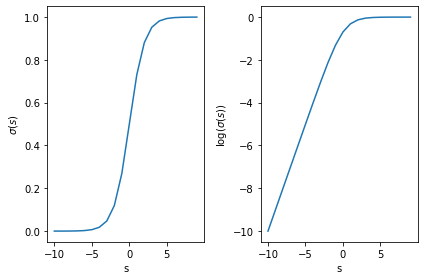

In [15]:
# EXAMple
# d)
def sigmoid(x):
    return 1/(1+np.exp(-x))

fig, axs = plt.subplots(1,2)
s = np.arange(-10,10,1)
axs[0].plot(s,sigmoid(s))
axs[0].set_ylabel('$\sigma(s)$')
axs[0].set_xlabel('s')
axs[1].plot(s,np.log(sigmoid(s)))
axs[1].set_ylabel('$\log(\sigma(s))$')
axs[1].set_xlabel('s')
plt.tight_layout()
plt.show()

### Part I: 1-dimensional logistic regression

Regression can also be used to predict probabilities given binary events. For this, we will start using sklearn.

**Tasks:**
1. Import the exams.csv data and use the sklearn tool LogisticRegression
2. Plot the resulting values with the fitted function

In [16]:
from sklearn.linear_model import LogisticRegression

In [39]:
### import the dataset 

# Import exams.csv
exams = pd.read_csv('exams.csv')
print(exams)
X = np.asarray(exams.hours_studied)
y = np.asarray(exams.exam_passed)
X = np.reshape(X,(-1,1))

    Unnamed: 0  hours_studied  exam_passed
0            0           0.50            0
1            1           0.75            0
2            2           1.00            0
3            3           1.25            0
4            4           1.50            0
5            5           1.75            0
6            6           1.75            1
7            7           2.00            0
8            8           2.25            1
9            9           2.50            0
10          10           2.75            1
11          11           3.00            0
12          12           3.25            1
13          13           3.50            0
14          14           4.00            1
15          15           4.25            1
16          16           4.50            1
17          17           4.75            1
18          18           5.00            1
19          19           5.50            1


In [46]:
### run regression and plot
clf = LogisticRegression(random_state=0).fit(X,y)
print(clf.score(X,y))
print(clf.predict(X))
print(clf.predict_proba(X))

0.8
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[[0.92858952 0.07141048]
 [0.90704455 0.09295545]
 [0.87984046 0.12015954]
 [0.84602638 0.15397362]
 [0.80480773 0.19519227]
 [0.75574059 0.24425941]
 [0.75574059 0.24425941]
 [0.69895285 0.30104715]
 [0.63533317 0.36466683]
 [0.56660539 0.43339461]
 [0.49521602 0.50478398]
 [0.42402118 0.57597882]
 [0.3558463  0.6441537 ]
 [0.29305565 0.70694435]
 [0.18924992 0.81075008]
 [0.14905371 0.85094629]
 [0.11617173 0.88382827]
 [0.08977835 0.91022165]
 [0.06891381 0.93108619]
 [0.04000986 0.95999014]]


### Part II: multi-dimensional linear regression

Now that we have a good intuition, we will scale the process to multiple input dimensions.

We will use data on life expectancy which can be found here: https://www.kaggle.com/kumarajarshi/life-expectancy-who

**Tasks:** 

1. Import the life_expectancy.csv data
2. Use sklearn's LinearRegression to fit the data
3. Make a plot of the coefficients. What do they mean? How can we interpret the results? 
4. If find a problem with the coefficients, suggest and implement a solution.

In [75]:
from sklearn.linear_model import LinearRegression

In [81]:
### import data
le = pd.read_csv('life_expectancy.csv')
y_le = le['Life expectancy ']
le.head()

Unnamed: 0  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0           0              65.0            263.0             62     0.01   
1           1              59.9            271.0             64     0.01   
2           2              59.9            268.0             66     0.01   
3           3              59.5            272.0             69     0.01   
4           4              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [82]:
# Conver to usable numpy array
X_le = le.iloc[:,2:]
X_fit = X_le.to_numpy()
y_fit = y_le.to_numpy()

In [93]:
### run regression
reg = LinearRegression().fit(X_fit,y_fit)

[1.68215282e+02 3.25530625e+01 4.53319588e+00 6.98973558e+02
 7.92177077e+01 2.22449424e+03 3.81286234e+01 4.42201334e+01
 8.35645846e+01 5.95592480e+00 8.41552456e+01 1.98386901e+00
 5.56603189e+03 1.46536259e+07 4.85063675e+00 4.90776228e+00
 6.31551243e-01 1.21198908e+01]


In [84]:
### plot coefficients

reg.coef_

array([-1.68885302e-02,  9.36938378e-02, -5.43483451e-02,  3.77682623e-04,
       -5.58249970e-03, -8.61733822e-06,  3.34980599e-02, -7.04701961e-02,
        7.83637889e-03,  7.97522211e-02,  1.43889187e-02, -4.38298048e-01,
        1.38327405e-05, -6.91652444e-10, -8.67022868e-03, -5.12278224e-02,
        9.82414672e+00,  8.78334955e-01])

In [ ]:
### How can you interpret these results?

# Coefficients do highly dependent on the units of each feature
# Coefficients get very high for low absolute values
# Suggestions: Input scaling

In [105]:
### Fix problem
from sklearn.preprocessing import StandardScaler#, MinMaxScaler

# Scale input to unit variance
scaler = StandardScaler()
X_fit_scaled = scaler.fit_transform(X_fit)
# run regressor
reg_scaled = LinearRegression().fit(X_fit_scaled,y_fit)
# print coeff
reg_scaled.coef_

array([ -2.11566697,  11.31920337,  -0.21891335,   0.66422886,
        -0.14289468,  -0.08688641,   0.66152835, -11.47597265,
         0.17587772,   0.18332548,   0.31040709,  -2.64316966,
         0.15869501,  -0.04871933,  -0.03986427,  -0.23832953,
         1.79814504,   2.454542  ])

### Part III: Regularization

We will use the data on life expectancy once again. This time, however, we will regularize our regression.

**Tasks:**

1. Use Ridge and Lasso from sklearn to fit the data. 
2. What is supposed to change between regularized and unregularized regression? Can you see this difference in practice?

In [106]:
from sklearn.linear_model import Lasso, Ridge

In [109]:
### fit and plot Lasso
clf = Lasso()
reg_Lasso = clf.fit(X_fit_scaled,y_fit)
reg_Lasso.coef_

array([-2.1201946 , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.2919542 , -0.        ,  0.        ,  0.        ,
        0.        , -2.00356139,  0.09260905, -0.        , -0.        ,
       -0.        ,  1.7531454 ,  2.5004118 ])

In [111]:
### fit and plot Ridge

clf_ridge = Ridge()
reg_ridge = clf_ridge.fit(X_fit_scaled,y_fit)
reg_ridge.coef_

array([-2.14091999e+00,  9.01624823e+00, -2.57806662e-01,  6.55658997e-01,
       -1.45492034e-01, -3.81497134e-02,  6.70600454e-01, -9.22918405e+00,
        1.87049659e-01,  1.80354899e-01,  3.33894623e-01, -2.64391722e+00,
        1.65118359e-01, -1.76652060e-03, -5.31163526e-02, -2.06276229e-01,
        1.81761423e+00,  2.46596803e+00])

### Part IV: cross validation

To find out how much we should optimally regularize, we use cross validation

**Tasks:**
1. Use sklearn to apply cross validation to Ridge and Lasso regression. Which values of alpha yield the best results?
2. Can you interpret these results? What does a small or large value of alpha imply?

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [150]:
### make CV pipeline
cv = 10
alpha = np.arange(0.01,1,0.01)
cvs_lasso = np.zeros((len(alpha),cv))
cvs_ridge = np.zeros((len(alpha),cv))
# Lasso cross validation
for i in range(len(alpha)):
    clf_lasso = make_pipeline(StandardScaler(),Lasso(alpha=alpha[i],max_iter=10000))
    clf_ridge = make_pipeline(StandardScaler(),Ridge(alpha=alpha[i],max_iter=10000))
    cvs_lasso[i,:] = cross_val_score(clf_lasso,X_fit,y_fit,cv=cv)
    cvs_ridge[i,:] = cross_val_score(clf_ridge,X_fit,y_fit,cv=cv)
# print(cvs_lasso.mean(axis=1))
# print(cvs_ridge.mean(axis=1))


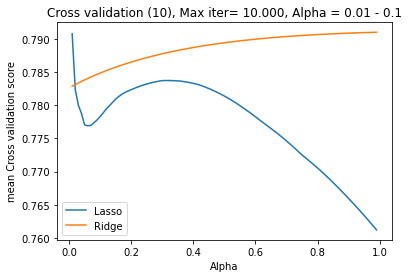

In [151]:
plt.plot(alpha,cvs_lasso.mean(axis=1),label = 'Lasso')
plt.plot(alpha,cvs_ridge.mean(axis=1), label = 'Ridge')
plt.title('Cross validation (10), Max iter= 10.000, Alpha = 0.01 - 0.1')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('mean Cross validation score')
plt.show()

### Final questions

1. Which kind of pitfalls did you notice during your application of different methods of regression?
2. How did you solve these pitfalls? 
3. If you come across linear regression coefficients in a paper, which kind of questions would come to your mind about these coefficients?
4. If you come across linear regression in a paper that claims to show a causal relationship, what do you look for in the paper?

### answer final high level questions:

1. Pitfalls:
- Data scaling is impacts linear regression results and determination of parameters
- Coefficients might still be not balanced 
- The choice of alpha constant is highly dependent on chosen regularization estimator 
2. Solutions:
- Use Standardscaler for input data
- Add regularization terms / use estimators with L2/L1 regularization
3. Questions: 
- Are the input features correlated to each other or independent?
- In which manner were steps in 2. performed? 
- Were data correclty scaled if needed?
4. What to look for:
- Is there an inherent correlation between input features? Are the obvious dependencies that cause causality?
- If not: Are the testing made, where one input feature is pertubated while the others are kept constant?
    - Tendencies in regression coefficients could then potentially used to claim causal relationship (Assuming independence of the inputs)